In [51]:
import networkx as nx
import numpy as np

import seaborn as sns
sns.set_theme()

In [52]:
p8 = nx.path_graph(8)
star = nx.star_graph(8)
house = nx.house_graph()

## Task 1 & 2

In [53]:
def _global_betweenness_path_length(graph):
        n = graph.number_of_nodes()
        LG = nx.average_shortest_path_length(graph)
        return  ((n - 1) * (LG - 1)) / 2

def _global_betweenness_standard(graph):
    n = graph.number_of_nodes()
    betweenness = nx.betweenness_centrality(graph, normalized=False)
    return sum(betweenness.values()) / n

def global_betweenness(graph, through_path_length=False):
    if through_path_length:
        return _global_betweenness_path_length(graph)

    return _global_betweenness_standard(graph)


In [54]:
print('p8', global_betweenness(p8), global_betweenness(p8, through_path_length=True))
print('star', global_betweenness(star), global_betweenness(star, through_path_length=True))
print('house', global_betweenness(house), global_betweenness(house, through_path_length=True))

p8 7.0 7.0
star 3.111111111111111 3.1111111111111107
house 0.8 0.7999999999999998


## Task 3

In [55]:
def check_corollary_4(graph):
    n = graph.number_of_nodes()
    m = graph.number_of_edges()
    T = nx.minimum_spanning_tree(graph)

    print(global_betweenness(graph), "<=", global_betweenness(T) - (m - n + 1) / n)
    return global_betweenness(graph) <= global_betweenness(T) - (m - n + 1) / n

In [56]:
N = 20
for i in range(N):
    rg = nx.erdos_renyi_graph(100, p=0.5)
    while not nx.is_connected(rg):
        rg = nx.erdos_renyi_graph(100, p=0.5)

    print(i, end='\t')
    assert check_corollary_4(rg)

0	24.46 <= 96.98
1	25.070000000000004 <= 67.62
2	24.609999999999996 <= 74.87
3	25.15 <= 72.72
4	24.289999999999996 <= 75.65
5	25.189999999999987 <= 88.59
6	24.90999999999999 <= 92.22
7	24.700000000000003 <= 71.42
8	24.919999999999995 <= 78.97
9	24.269999999999996 <= 62.32000000000001
10	24.589999999999982 <= 76.06
11	24.719999999999995 <= 68.85
12	25.08999999999999 <= 78.61
13	24.55 <= 67.05000000000001
14	24.709999999999994 <= 63.260000000000005
15	24.689999999999994 <= 70.12
16	24.43999999999999 <= 79.85
17	24.999999999999986 <= 76.00999999999999
18	25.030000000000005 <= 67.67999999999999
19	25.009999999999994 <= 111.08000000000001


In [57]:
def check_theorem_5(graph : nx.Graph, w):
    n = graph.number_of_nodes()
    eps = nx.eccentricity(graph)

    G_prime = graph.copy()

    assert n not in graph.nodes
    G_prime.add_edge(n, w)
    
    CB_G_prime = global_betweenness(G_prime)

    CB_G = global_betweenness(graph) 
    S = sum(k * len(nx.descendants_at_distance(graph, w, k)) for k in range(1, eps[w] + 1))
    RHS = n / (n + 1) * CB_G + 1 / (n + 1) * S

    print(CB_G_prime, ' == ', RHS)
    return abs(CB_G_prime - RHS) < 1e-9

In [58]:
N = 20
for i in range(N):
    rg = nx.erdos_renyi_graph(20, p=0.5)
    while not nx.is_connected(rg):
        rg = nx.erdos_renyi_graph(20, p=0.5)

    print(i, end=':\n')
    for w in rg.nodes:
        print('\t', w, end='\t')
        assert check_theorem_5(rg, w)

0:
	 0	6.571428571428571  ==  6.571428571428569
	 1	6.571428571428571  ==  6.571428571428569
	 2	6.476190476190476  ==  6.4761904761904745
	 3	6.714285714285714  ==  6.714285714285713
	 4	6.571428571428571  ==  6.571428571428569
	 5	6.761904761904762  ==  6.76190476190476
	 6	6.666666666666667  ==  6.666666666666665
	 7	6.761904761904764  ==  6.76190476190476
	 8	6.523809523809524  ==  6.523809523809522
	 9	6.61904761904762  ==  6.619047619047617
	 10	6.761904761904762  ==  6.76190476190476
	 11	6.523809523809523  ==  6.523809523809522
	 12	6.666666666666665  ==  6.666666666666665
	 13	6.714285714285713  ==  6.714285714285713
	 14	6.428571428571429  ==  6.428571428571427
	 15	6.714285714285714  ==  6.714285714285713
	 16	6.666666666666665  ==  6.666666666666665
	 17	6.571428571428571  ==  6.571428571428569
	 18	6.476190476190476  ==  6.4761904761904745
	 19	6.523809523809524  ==  6.523809523809522
1:
	 0	5.523809523809525  ==  5.523809523809525
	 1	5.761904761904762  ==  5.761904761904

## Task 4

In [59]:
def check_proposition_6(graph, u, v):
    assert u in graph.nodes
    assert v in graph.nodes

    d_uv = nx.shortest_path_length(graph, source=u, target=v)
    assert 1 <= d_uv <= 2

    n = graph.number_of_nodes()
    
    w = n
    assert w not in graph.nodes
    G_prime = graph.copy()
    G_prime.add_edge(w, u)
    G_prime.add_edge(w, v)

    LHS = 1 / (n + 1) * (n * global_betweenness(graph) + n - 2)
    RHS = global_betweenness(G_prime)

    print(LHS, '<=', RHS)
    return LHS <= RHS
    


In [60]:
check_proposition_6(star, 0, 2)

3.5 <= 3.5


True

## Task 5

In [61]:
n = 15
k = 4

data = []
for p in np.linspace(0, 1, num=20):
    sigma = nx.sigma(nx.watts_strogatz_graph(n, k, p))
    data.append((p, sigma))
    
data

[(0.0, 2.5778061224489806),
 (0.05263157894736842, 1.9187959866220736),
 (0.10526315789473684, 1.7400261134484263),
 (0.15789473684210525, 1.5431386130993612),
 (0.21052631578947367, 1.172278481012658),
 (0.2631578947368421, 1.4079675138276269),
 (0.3157894736842105, 1.614510995370371),
 (0.3684210526315789, 0.9458450046685342),
 (0.42105263157894735, 1.0637254901960784),
 (0.47368421052631576, 0.9436160298229262),
 (0.5263157894736842, 1.1688923395445137),
 (0.5789473684210527, 0.7866184448462928),
 (0.631578947368421, 1.0852192362093354),
 (0.6842105263157894, 1.3474933027171834),
 (0.7368421052631579, 0.8879120879120879),
 (0.7894736842105263, 1.014146821061831),
 (0.8421052631578947, 1.2043360433604338),
 (0.894736842105263, 0.957949976146664),
 (0.9473684210526315, 0.958380902957966),
 (1.0, 0.7090438915292143)]

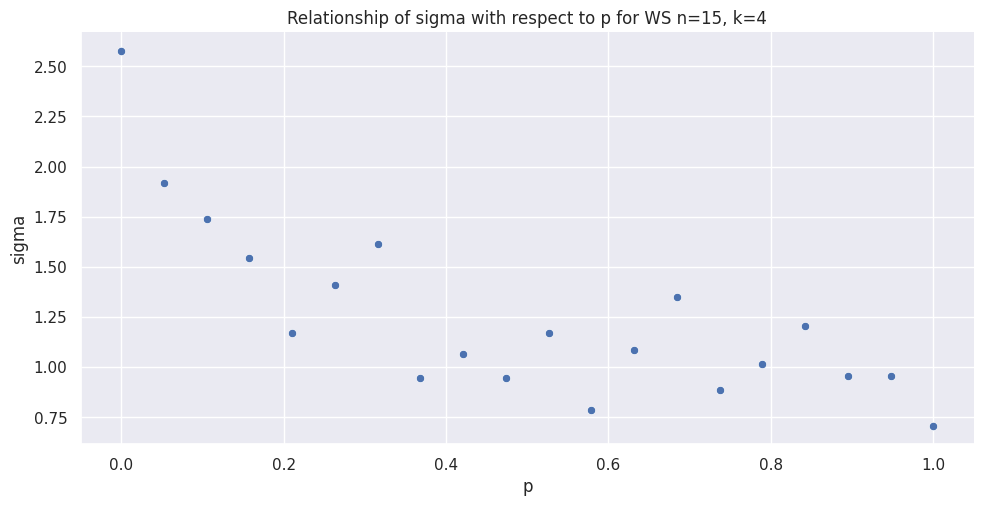

In [62]:
ps = [ _[0] for _ in data ]
sigmas = [ _[1] for _ in data ]

g = sns.relplot(x=ps, y=sigmas, aspect=2)
g.set(title="Relationship of sigma with respect to p for WS n=15, k=4")
g.set_ylabels("sigma")
g.set_xlabels("p")

## Task 6

In [63]:
# Fix n, p
p = 0.3
n = 20

ks = range(4, 15)
sigmas = []
for k in ks:
    sigma = nx.sigma(nx.watts_strogatz_graph(n, k, p))
    sigmas.append(sigma)

sigmas

[1.1894893899204244,
 1.8032352161230445,
 1.2592330383480825,
 1.0906416821004468,
 1.1272902603664419,
 1.0190929832285955,
 1.0516129032258061,
 1.0332636278195488,
 1.0129870129870129,
 1.0101744186046513,
 1.0167162811999084]

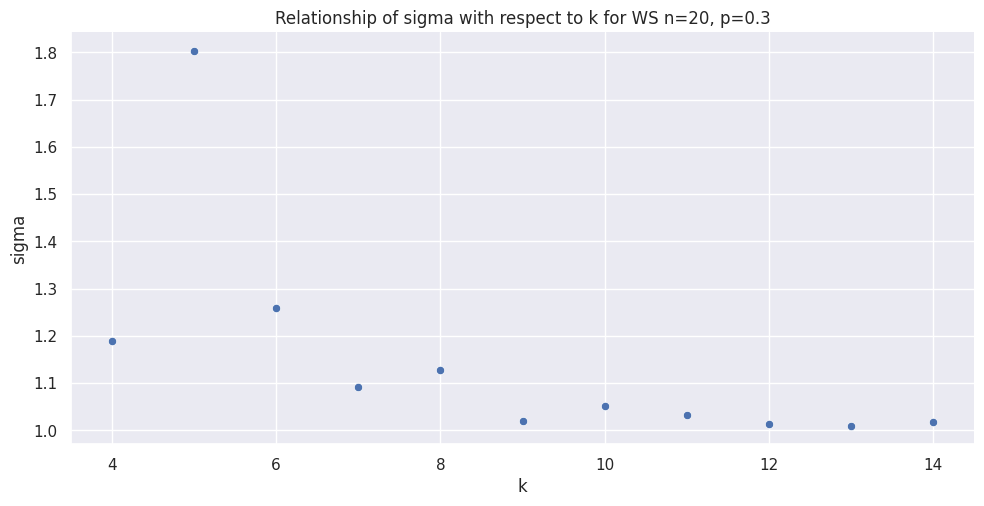

In [64]:
g = sns.relplot(x=ks, y=sigmas, aspect=2)
g.set(title="Relationship of sigma with respect to k for WS n=20, p=0.3")
g.set_ylabels("sigma")
g.set_xlabels("k")

In [65]:
# Fix k, p
p = 0.3
k = 4

ns = range(4, 20)
sigmas = []
for n in ns:
    sigma = nx.sigma(nx.watts_strogatz_graph(n, k, p))
    sigmas.append(sigma)

sigmas

[1.0,
 1.0,
 0.9999999999999998,
 1.046511627906977,
 1.018688628444726,
 1.0408033826638479,
 1.19788967049241,
 1.4278846153846156,
 1.0091250670960816,
 1.434737923946557,
 0.9357045143638849,
 0.5574618736383441,
 1.7423026411790457,
 2.292785234899328,
 1.274431591543678,
 0.9849726775956287]

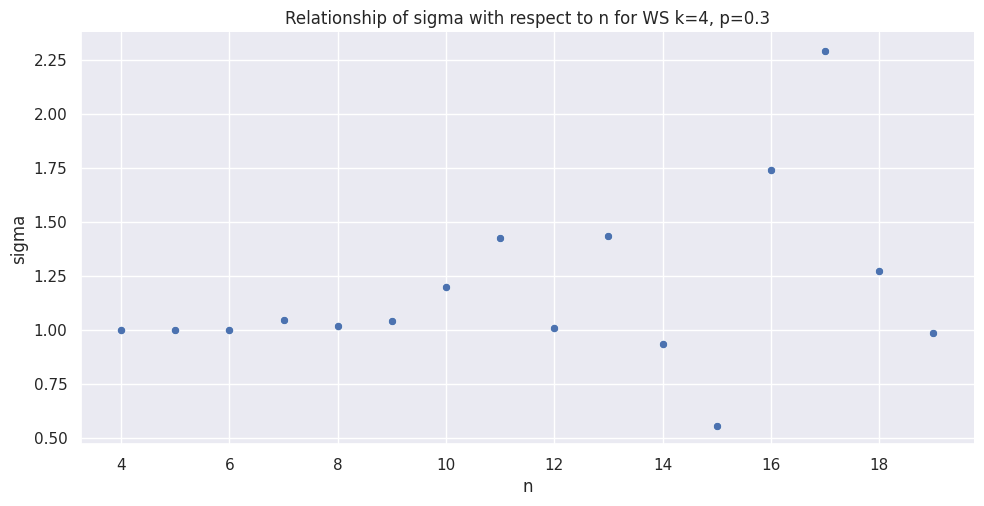

In [66]:
g = sns.relplot(x=ns, y=sigmas, aspect=2)
g.set(title="Relationship of sigma with respect to n for WS k=4, p=0.3")
g.set_ylabels("sigma")
g.set_xlabels("n")